In [1]:
%pylab nbagg
%load_ext autoreload
%autoreload 2
import mpl_interactions as pli

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Test the fastcat mhd file reader from fastcat.utils
import fastcat as fc
import numpy as np
import matplotlib.pyplot as plt
import fastcat.ggems_scatter as gg_scatter


# Read the mhd file from data
mhd_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604.mhd'
range_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
material_file = '/home/jericho/1-Workspace/fastcat_gate/Materials.txt'

Catphan604_phantom = fc.utils.get_phantom_from_mhd(mhd_file,range_file,material_file)

s = fc.spectrum.Spekpy(120,12)

# Make a dummy spectrum
s.x = np.array([99.999, 100, 100.001])
s.y = np.array([0,1,0])
# s.attenuate(0.4,fc.get_mu(z=13))
det = fc.Detector(s,'CsI-784-micrometer')
angles = np.linspace(0,np.pi*2,10,endpoint=False)   

[2023-11-13 09:59:56,895] {utils.py:231} INFO - Loading density data from file
[2023-11-13 09:59:56,900] {utils.py:321} INFO -     Saved Air atten to file in data/mu/Air.csv
[2023-11-13 09:59:56,902] {utils.py:321} INFO -     Saved polyurethane atten to file in data/mu/polyurethane.csv
[2023-11-13 09:59:56,902] {utils.py:321} INFO -     Saved teflon atten to file in data/mu/teflon.csv
[2023-11-13 09:59:56,903] {utils.py:321} INFO -     Saved pmp atten to file in data/mu/pmp.csv
[2023-11-13 09:59:56,905] {utils.py:321} INFO -     Saved bone50 atten to file in data/mu/bone50.csv
[2023-11-13 09:59:56,906] {utils.py:321} INFO -     Saved ldpe atten to file in data/mu/ldpe.csv
[2023-11-13 09:59:56,906] {utils.py:321} INFO -     Saved polystyrene atten to file in data/mu/polystyrene.csv
[2023-11-13 09:59:56,907] {utils.py:321} INFO -     Saved acrylic atten to file in data/mu/acrylic.csv
[2023-11-13 09:59:56,909] {utils.py:321} INFO -     Saved bone20 atten to file in data/mu/bone20.csv
[202

In [3]:
Catphan604_phantom.return_projs(det,s,angles, 
                                mgy=0, ASG=False,scat_on=False,
                                det_on=False,bowtie=False,
                                filter='bowtie_real',return_intensity=True)

[2023-11-13 09:59:57,957] {simulate.py:221} INFO - Initializing filter bowtie_real
[2023-11-13 09:59:57,983] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-13 09:59:57,984] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-13 09:59:58,826] {simulate.py:579} INFO - Running Simulations
[2023-11-13 09:59:58,826] {simulate.py:606} INFO -     Simulating 100 keV
[2023-11-13 09:59:59,621] {simulate.py:821} INFO - Weighting simulations
[2023-11-13 09:59:59,622] {simulate.py:904} INFO -     No noise was added


In [4]:
import SimpleITK as sitk
import numpy as np
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    '''
    :param filename: path to the .mhd file
    Returns: ct_scan, origin, spacing
    '''
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage).squeeze()

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

<IPython.core.display.Javascript object>


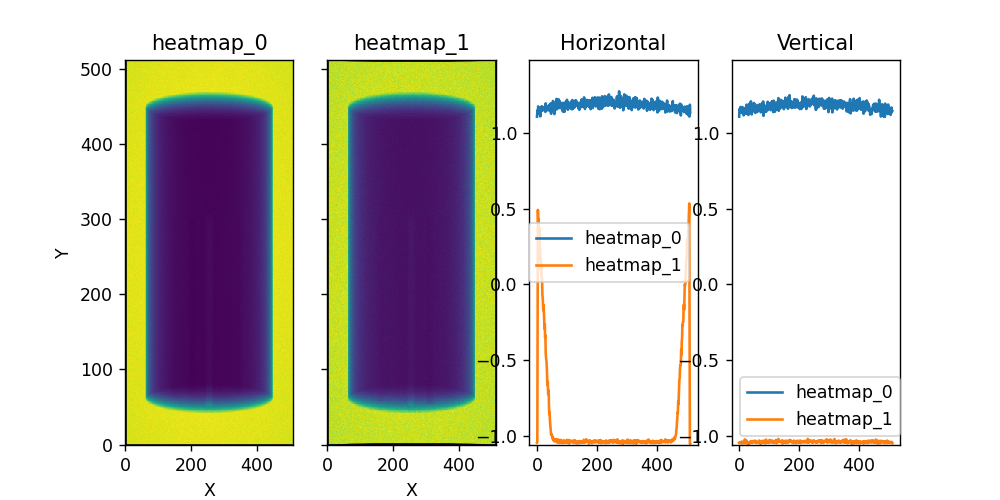

<IPython.core.display.Javascript object>


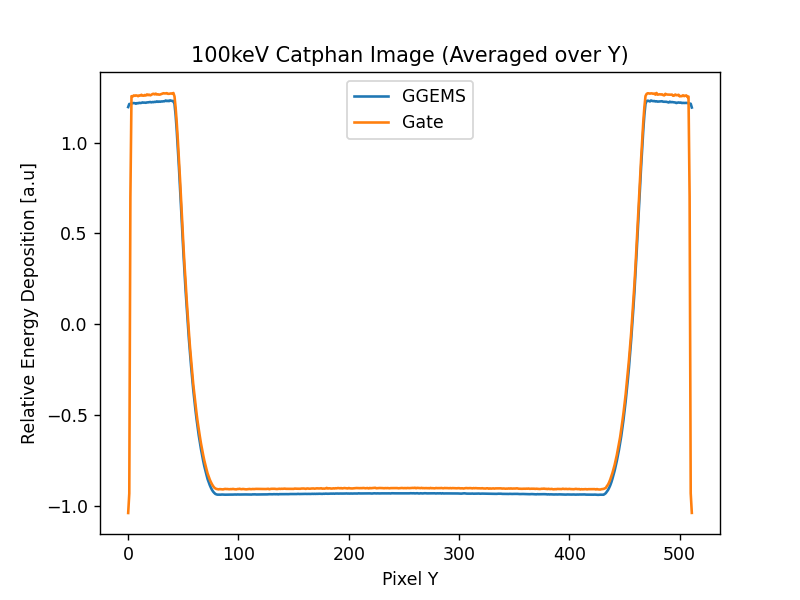

<IPython.core.display.Javascript object>


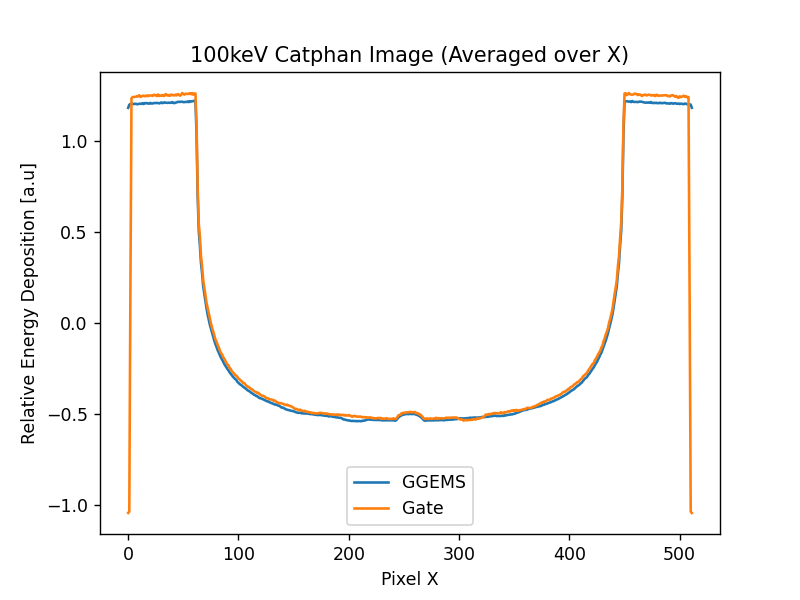

In [12]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_1e10.mhd') # What is this in? - Should be MeV as well according to didier
ggems_image2, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/ogate_1e09_121kVp_2mmAl_edep.mhd')

ggems_image = np.rot90(ggems_image,3)
# # ggems_image2 = ggems_image[0]
ggems_norm = (ggems_image - np.mean(ggems_image))/np.std(ggems_image)
ggems_edep_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_norm,np.rot90(ggems_edep_norm,0)],figsize=[8,4],slices='both')

plt.figure()
plt.title('100keV Catphan Image (Averaged over Y)')
plt.plot(np.mean(ggems_norm[:,100:-100],axis=1))
plt.plot(np.mean(np.rot90(ggems_edep_norm,0)[:,100:-100],axis=1))
plt.ylabel('Relative Energy Deposition [a.u]')
plt.xlabel('Pixel Y')
plt.legend(['GGEMS','Gate'])

plt.figure()
plt.title('100keV Catphan Image (Averaged over X)')
plt.plot(np.mean(ggems_norm[:-250,:],axis=0))
plt.plot(np.mean(np.rot90(ggems_edep_norm,0)[:-250,:],axis=0))
plt.ylabel('Relative Energy Deposition [a.u]')
plt.xlabel('Pixel X')

plt.legend(['GGEMS','Gate'])

<IPython.core.display.Javascript object>


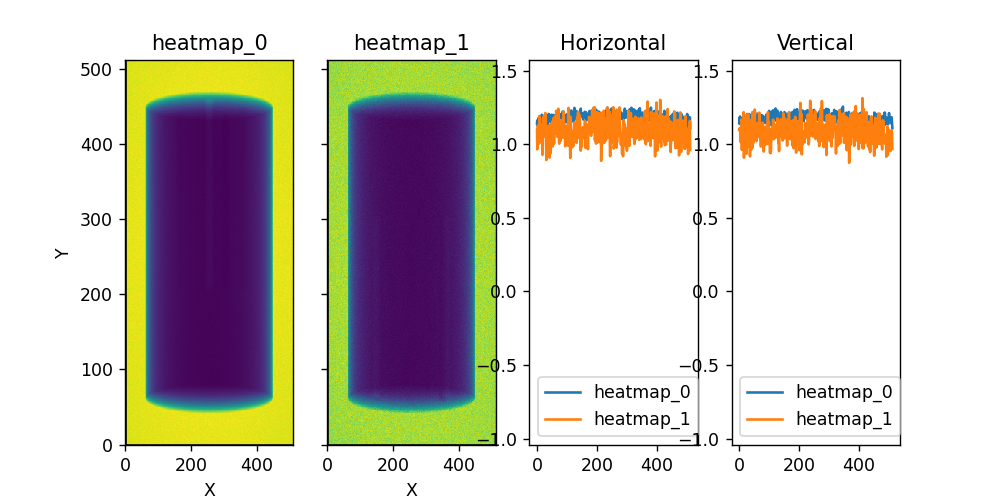

<IPython.core.display.Javascript object>


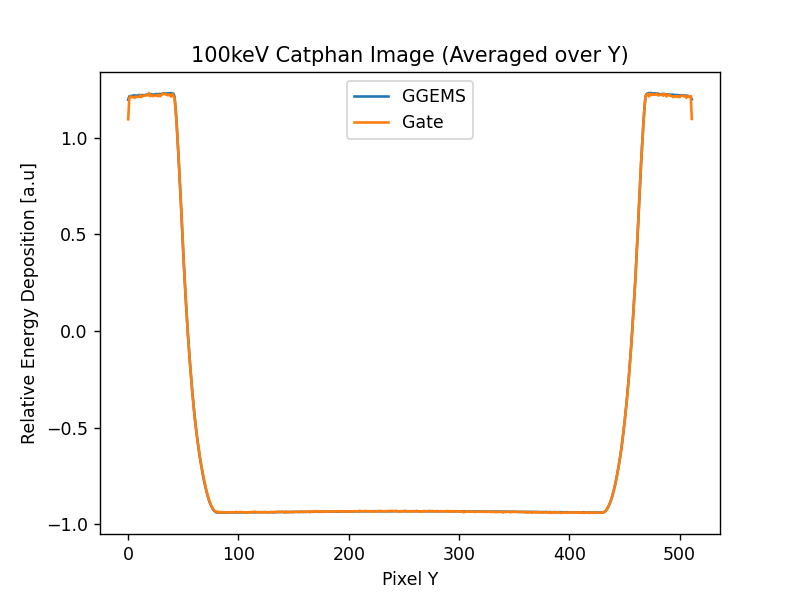

<IPython.core.display.Javascript object>


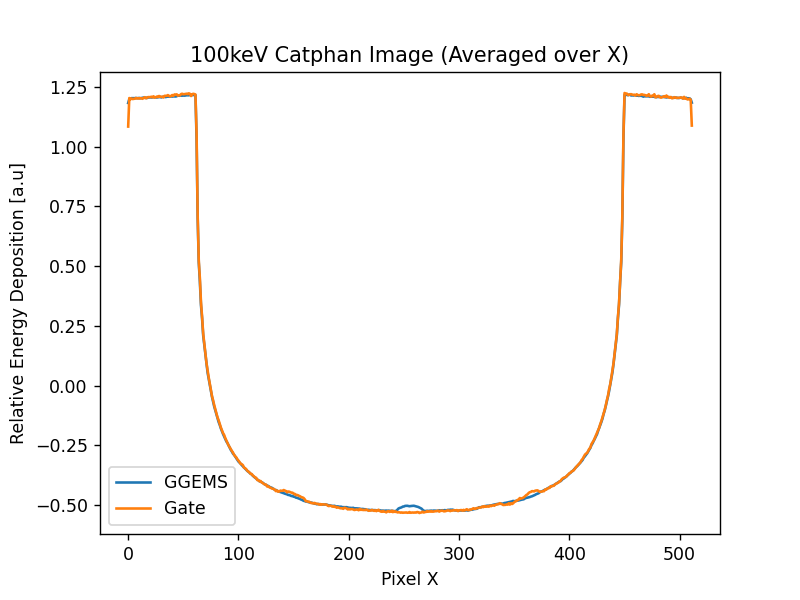

In [33]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_edep_1e10_edep.mhd') # What is this in? - Should be MeV as well according to didier
ggems_image2, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/gate_1000000000.0_100keV_edep.mhd')

# # ggems_image2 = ggems_image[0]
ggems_norm = (ggems_image - np.mean(ggems_image))/np.std(ggems_image)
ggems_edep_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_norm,np.rot90(ggems_edep_norm,0)],figsize=[8,4],slices='both')

plt.figure()
plt.title('100keV Catphan Image (Averaged over Y)')
plt.plot(np.mean(ggems_norm[:,100:-100],axis=1))
plt.plot(np.mean(np.rot90(ggems_edep_norm,0)[:,100:-100],axis=1))
plt.ylabel('Relative Energy Deposition [a.u]')
plt.xlabel('Pixel Y')
plt.legend(['GGEMS','Gate'])

plt.figure()
plt.title('100keV Catphan Image (Averaged over X)')
plt.plot(np.mean(ggems_norm[:,:],axis=0))
plt.plot(np.mean(np.rot90(ggems_edep_norm,0)[:,:],axis=0))
plt.ylabel('Relative Energy Deposition [a.u]')
plt.xlabel('Pixel X')

plt.legend(['GGEMS','Gate'])

<IPython.core.display.Javascript object>


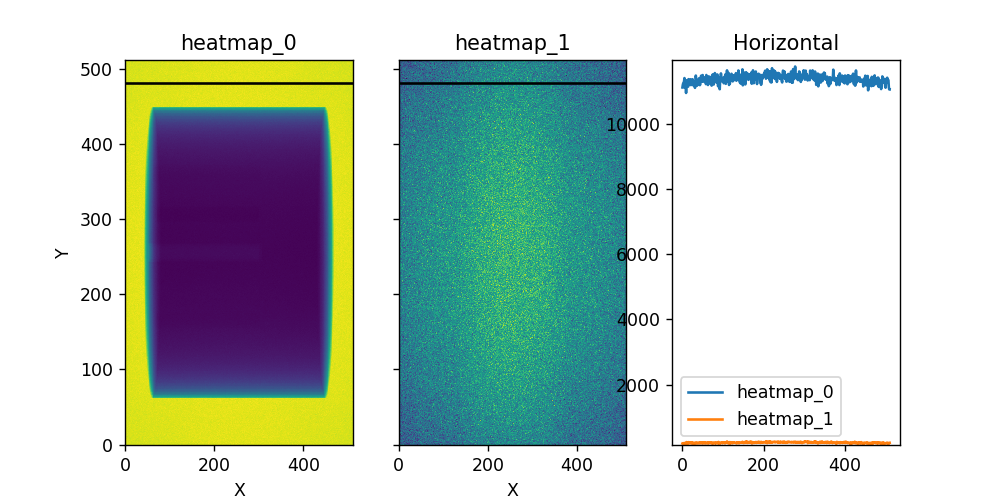

(<Figure size 800x400 with 3 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'heatmap_1'}, xlabel='X'>,
        <Axes: title={'center': 'Horizontal'}>], dtype=object))

In [54]:
pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_image[0],scatter_image[0]],figsize=[8,4])

In [22]:
from fastcat.utils import read_range_file

In [41]:
read_range_file2(range_file)

(array(['Air', 'polyurethane', 'teflon', 'pmp', 'bone50', 'ldpe',
        'polystyrene', 'acrylic', 'bone20', 'pom'], dtype='<U12'),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [40]:
def read_range_file2(filename):
    """Reads a range file and returns a list of ranges"""
    materials = []
    low_range = []
    high_range = []
    with open(filename) as f:
        for line in f:
            words = line.split()
#             print(len(words))
            if len(words) == 3:
                materials.append(words[2])
                low_range.append(float(words[0]))
                high_range.append(float(words[1]))

    return np.array(materials), np.array(low_range), np.array(high_range)

In [39]:
'this has '.split()

['this', 'has']

<IPython.core.display.Javascript object>


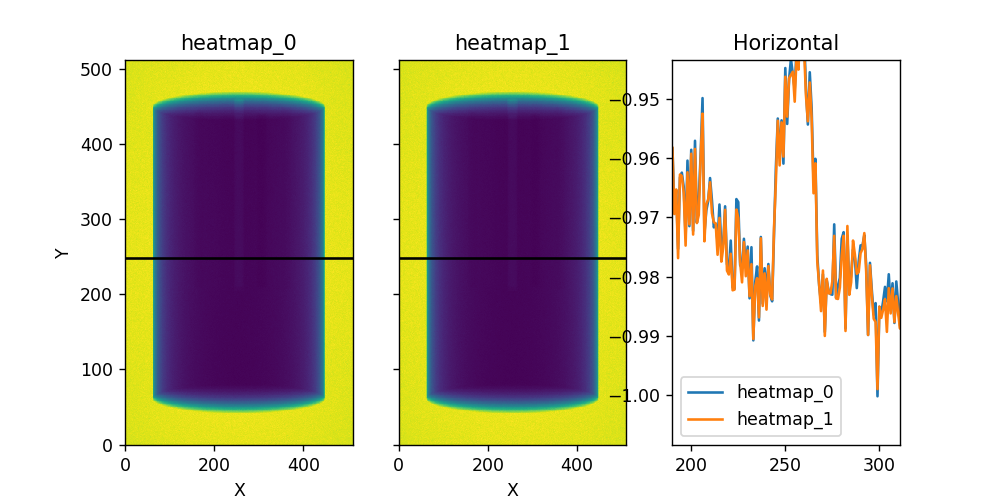

(<Figure size 800x400 with 3 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'heatmap_1'}, xlabel='X'>,
        <Axes: title={'center': 'Horizontal'}>], dtype=object))

In [90]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/run_edep_1e10_hit.mhd') # What is this in? - Should be MeV as well according to didier

ggems_image2, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/run_edep_1e10_dose.mhd')

# ggems_image2 = ggems_image[0]
ggems_norm = (ggems_image - np.mean(ggems_image))/np.std(ggems_image)
ggems_edep_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_norm,np.rot90(ggems_edep_norm,0)],figsize=[8,4])

# print(np.mean((ggems_norm - np.rot90(fastcat_norm,3))**2))

<IPython.core.display.Javascript object>


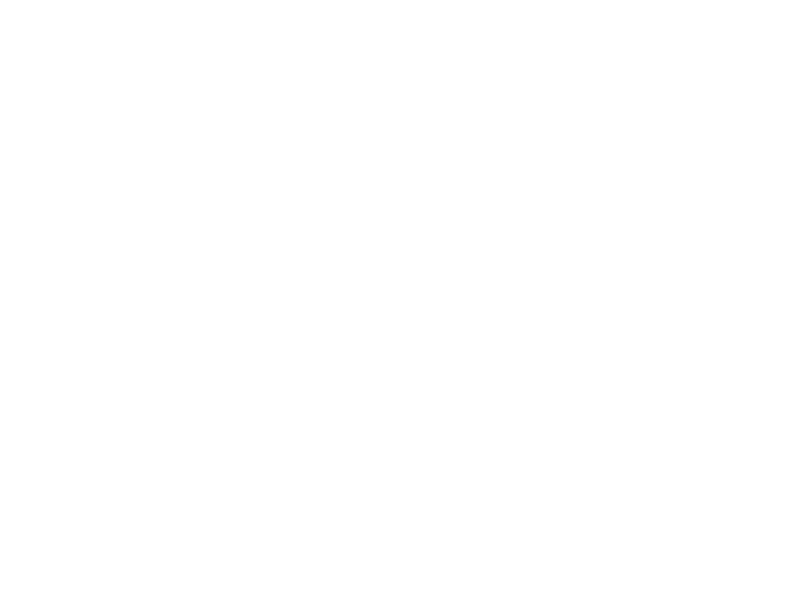

<IPython.core.display.Javascript object>


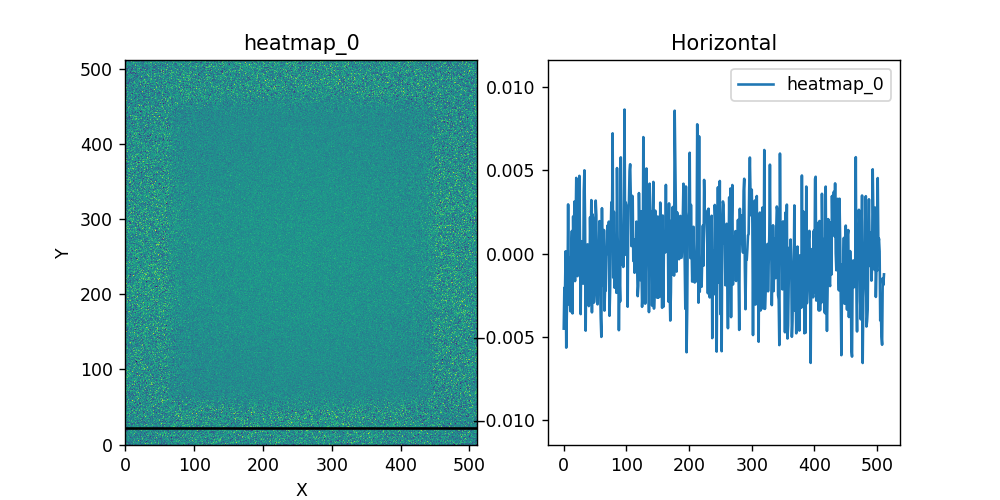

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'Horizontal'}>], dtype=object))

In [91]:
# plt.figure()
pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [(ggems_norm - np.rot90(ggems_edep_norm,0))/np.max(ggems_norm)],figsize=[8,4])

<IPython.core.display.Javascript object>


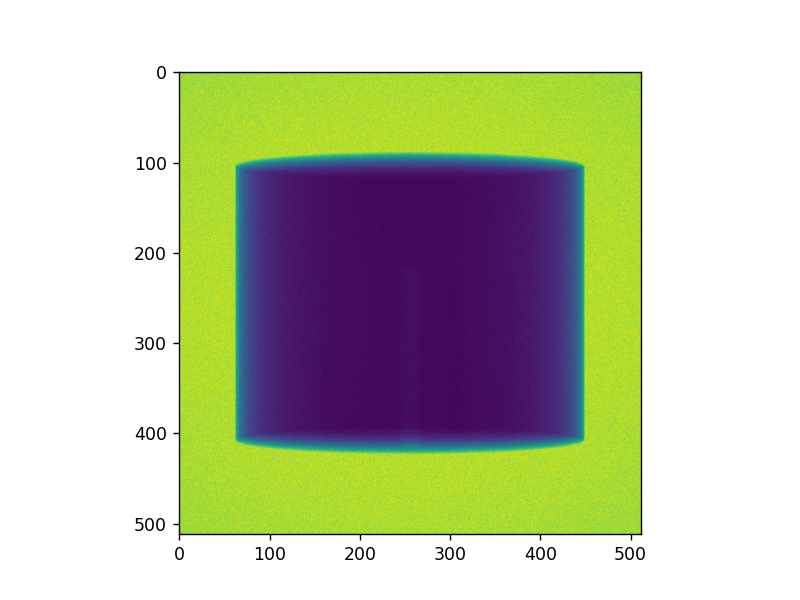

In [58]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/run_edep_hit.mhd') # What is this in? - Should be MeV as well according to didier

plt.figure()
plt.imshow(ggems_image)

In [92]:
import spekpy as sp

In [99]:
spec = np.loadtxt('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/data/spectrum_120kVp_2mmAl.dat')

<IPython.core.display.Javascript object>


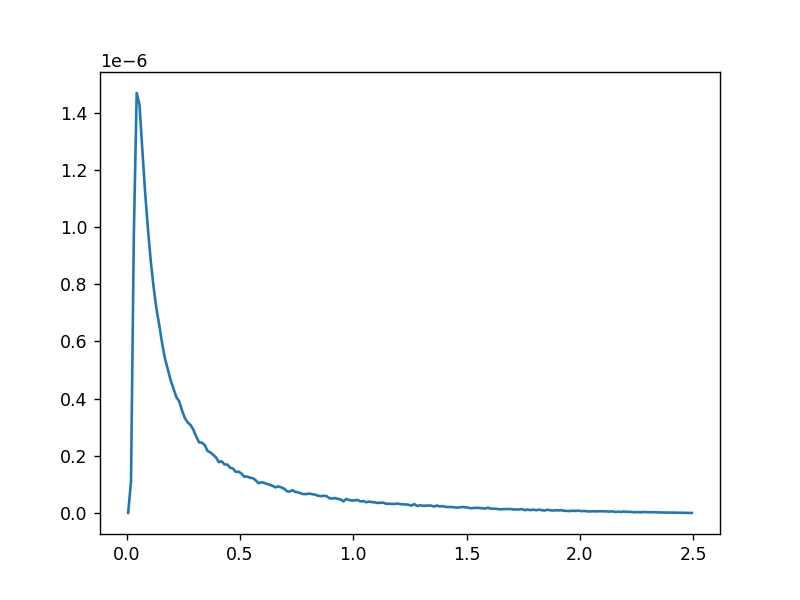

In [103]:
plt.figure()
plt.plot(spec[:,0],spec[:,1])

In [102]:
spec = np.loadtxt('/home/jericho/Software/fastcat/fastcat/data/MV_spectra/Al_spectrum_25.txt')